# Chapter 2

In [13]:
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import matplotlib.pyplot as plt

#### 2.2

In [8]:
stats.binom.pmf(6, n=9, p=0.5)

0.16406250000000006

#### 2.3

In [16]:
# define grid
p_grid = np.linspace(0, 1, 20)
# define prior
prior = [1] * 20
# calculate likelihood
likelihood = stats.binom.pmf(6, n=9, p=p_grid)
# calculate posterior
unstd_post = likelihood * prior
#normalize posterior
posterior = unstd_post / sum(unstd_post)

#### 2.4

Text(0, 0.5, 'posterior probability')

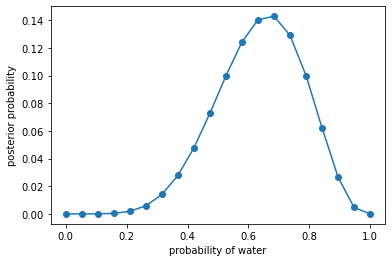

In [20]:
plt.plot(p_grid, posterior, marker='o')
plt.xlabel('probability of water')
plt.ylabel('posterior probability')

#### 2.5

Text(0, 0.5, 'posterior probability')

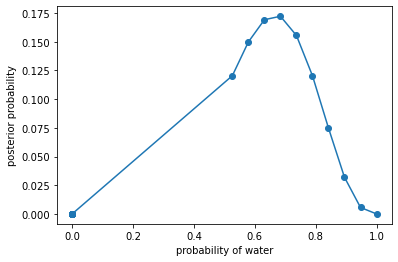

In [22]:
# define grid
p_grid = np.linspace(0, 1, 20)
p_grid = [x if x > 0.5 else 0 for x in p_grid]
# define prior
prior = [1] * 20
# calculate likelihood
likelihood = stats.binom.pmf(6, n=9, p=p_grid)
# calculate posterior
unstd_post = likelihood * prior
#normalize posterior
posterior = unstd_post / sum(unstd_post)

plt.plot(p_grid, posterior, marker='o')
plt.xlabel('probability of water')
plt.ylabel('posterior probability')

#### 2.6

In [34]:
data = np.repeat((0, 1), (3, 6))
with pm.Model() as model:
    p = pm.distributions.continuous.Uniform('p', 0, 1)
    W = pm.distributions.discrete.Binomial('W', len(data), p, observed=data.sum())
    mean_q = pm.find_MAP()
    std_q = ((1 / pm.find_hessian(mean_q, vars=[p])) ** 0.5)[0]
mean_q['p'], std_q

logp = -1.8075, ||grad|| = 1.5: 100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 305.15it/s]


(array(0.66666667), array([0.15713484]))

In [35]:
norm = stats.norm(mean_q, std_q)
prob = 0.89
z = stats.norm.ppf([(1 - prob) / 2, (1 + prob) / 2])
pi = mean_q["p"] + std_q * z
pi

array([0.41553484, 0.91779849])

In [ ]:
data = np.repeat((0, 1), (3, 6))
with pm.Model() as model:
    p = pm.distributions.continuous.Uniform('p', 0, 1)
    W = pm.distributions.discrete.Binomial('W', len(data), p, observed=data.sum())
    pm.sample(500)